In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example2').getOrCreate()

In [8]:
# RDD [str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1.take(5)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS',
 '2025-07-31 10:10:00 ERROR User=kim ACTION=DELETE RESULT=FAIL',
 '2025-07-31 10:12:14 INFO User=choi ACTION=LOGOUT RESULT=SUCCESS']

In [9]:
# RDD[dict]- data.json

In [10]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json')
rdd2.take(5)

['{"user": "kim", "action": "login", "result": "success", "time": "2025-07-31 10:00:01"}',
 '{"user": "lee", "action": "download", "result": "fail", "time": "2025-07-31 10:05:43"}',
 '{"user": "park", "action": "upload", "result": "success", "time": "2025-07-31 10:08:22"}',
 '{"user": "kim", "action": "delete", "result": "fail", "time": "2025-07-31 10:10:00"}',
 '{"user": "choi", "action": "logout", "result": "success", "time": "2025-07-31 10:12:14"}']

In [11]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2.take(5)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'},
 {'user': 'kim',
  'action': 'delete',
  'result': 'fail',
  'time': '2025-07-31 10:10:00'},
 {'user': 'choi',
  'action': 'logout',
  'result': 'success',
  'time': '2025-07-31 10:12:14'}]

In [12]:
spark.stop()

In [13]:
# RDD의 데이터 읽기 패턴
1. RDD 생성 - type지정 x
2. 형식 변환 - map()
3. take(n)

SyntaxError: invalid syntax (2510275108.py, line 2)

In [14]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName('country-student-counts2')
conf

In [15]:
spark = SparkContext(conf=conf).getOrCreate()
#spark.stop()

In [16]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.submitTime', '1754353581397'),
 ('spark.app.startTime', '1754353622945'),
 ('spark.driver.host', 'b81dfefa0d89'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '39929'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.sec

In [17]:
spark.stop()

In [18]:
import os
os.getcwd()  # 컨테이너 내부 경로

'/home/jovyan/work'

In [19]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [20]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir,filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD 생성

In [21]:
spark = SparkContext(conf=conf).getOrCreate()

In [22]:
lines = spark.textFile('file:///' + filepath.replace('||','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [23]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [24]:
lines.count() #대용량일 경우 문제 -> take(n)

481

In [25]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [26]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [27]:
countries = datas.map(lambda row: row.split(',')[2])
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [28]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [29]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [30]:
sorted(result.items(), key = lambda x: x[1], reverse = True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [31]:
sorted(result.items(), key=lambda x: x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [32]:
total_su = sum(result.values())

In [33]:
# 비율 계산
percentages = {k: round(v / total_su * 100, 2) for k, v in result.items()}
percentages

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

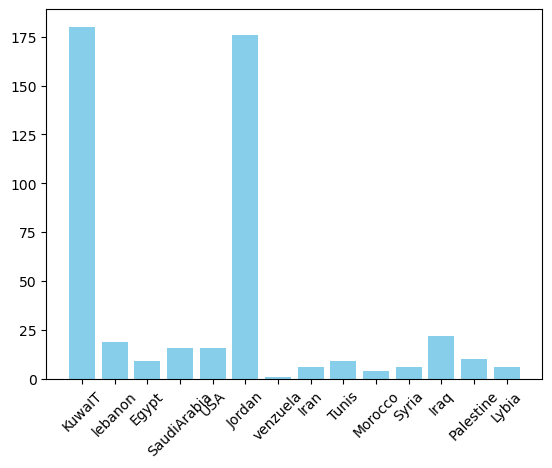

In [34]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts, color='skyblue')
plt.xticks(rotation=45)  # x축 국가 이름 회전
plt.show()

In [35]:
spark.stop()

# RDD 연습

In [36]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [37]:
try:
    sc.stop()  # 기존 SparkContext 종료
except:
    pass

conf = SparkConf().setMaster("local").setAppName('RDD-practice')
sc = SparkContext(conf=conf)

In [38]:
countries = sc.parallelize(data)

In [39]:
print(countries.collect())

['KuwaIT', 'lebanon', 'Jordan', 'Jordan', 'USA', 'Egypt', 'Jordan', 'USA', 'Iran', 'Iran', 'KuwaIT']


In [40]:
# 소문자로 변환 lower()
countries_lower = countries.map(lambda x: x.lower())
print(countries_lower.collect())

['kuwait', 'lebanon', 'jordan', 'jordan', 'usa', 'egypt', 'jordan', 'usa', 'iran', 'iran', 'kuwait']


In [41]:
# Jordan 추출
countries_Jordan = countries.filter(lambda x: x == 'Jordan')
countries_Jordan
print(countries_Jordan.collect())

['Jordan', 'Jordan', 'Jordan']


In [42]:
# 몇개국인지 카운트하기: distinct(), count()
countries_count_country = countries.distinct().count()
print(countries_count_country)

6


In [43]:
# 국가별 빈도수

In [44]:
data

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [45]:
country_pairs = countries_lower.map(lambda x: (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [46]:
country_counts = country_pairs.reduceByKey(lambda a,b: a+b)
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [47]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [48]:
country_counts.sortBy(lambda x:x[1], ascending = False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [49]:
countries.reduce(lambda a, b: a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

# 저장소에 저장하기

In [50]:
output_path = 'output/countries_result'

In [51]:
import shutil

In [52]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries.saveAsTextFile(output_path) #저장소 경로

In [61]:
sc.stop()

# mnm_dataset연습

In [94]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('mnms count example')\
            .getOrCreate()

In [95]:

spark

In [96]:
rdd = spark.sparkContext.textFile('learning_spark_data/mnm_dataset.csv')

In [97]:
header = rdd.first()
data = rdd.filter(lambda line: line!= header)\
            .map(lambda line: line.split(','))

In [98]:
data.take(3)

[['TX', 'Red', '20'], ['NV', 'Blue', '66'], ['CO', 'Blue', '79']]

In [99]:
rdd1 = data.map(lambda x: (x[0], int(x[2])))
rdd1.take(3)

[('TX', 20), ('NV', 66), ('CO', 79)]

In [100]:
rdd2 = rdd1.reduceByKey(lambda a,b: a+b)
rdd2.take(3)

[('NV', 548477), ('CO', 556302), ('OR', 542169)]

In [101]:
#state, color count
rdd3 = data.map(lambda x: ((x[0], x[1]), int(x[2])))\
        .reduceByKey(lambda a,b: a+b)
rdd3.take(3)

[(('NV', 'Blue'), 90003), (('CO', 'Blue'), 93412), (('OR', 'Blue'), 90526)]

In [102]:
rdd3.collect()

[(('NV', 'Blue'), 90003),
 (('CO', 'Blue'), 93412),
 (('OR', 'Blue'), 90526),
 (('WA', 'Yellow'), 92920),
 (('OR', 'Green'), 89578),
 (('NV', 'Green'), 91331),
 (('AZ', 'Blue'), 89971),
 (('NV', 'Red'), 89346),
 (('TX', 'Brown'), 90736),
 (('CO', 'Red'), 89465),
 (('AZ', 'Green'), 91882),
 (('NM', 'Yellow'), 92747),
 (('WY', 'Yellow'), 87800),
 (('CO', 'Orange'), 90971),
 (('NV', 'Orange'), 93929),
 (('CA', 'Green'), 93505),
 (('UT', 'Red'), 90995),
 (('CA', 'Red'), 91527),
 (('TX', 'Yellow'), 93819),
 (('AZ', 'Orange'), 91684),
 (('AZ', 'Red'), 90042),
 (('CA', 'Blue'), 89123),
 (('UT', 'Green'), 88392),
 (('WA', 'Brown'), 93082),
 (('OR', 'Red'), 90286),
 (('UT', 'Blue'), 89977),
 (('NM', 'Brown'), 93447),
 (('WY', 'Brown'), 86110),
 (('CA', 'Orange'), 90311),
 (('OR', 'Orange'), 94514),
 (('CO', 'Green'), 93724),
 (('UT', 'Orange'), 91341),
 (('TX', 'Red'), 95404),
 (('WY', 'Blue'), 91002),
 (('CA', 'Yellow'), 100956),
 (('WA', 'Green'), 96486),
 (('TX', 'Green'), 95753),
 (('AZ', '

# output 으로 내보내기

In [103]:
output_path = 'output/mnms_result'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
rdd3.saveAsTextFile(output_path) #저장소 경로

In [104]:
!python 02_mnms_result_load.py

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/05 00:36:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/05 00:36:49 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
결과 미리보기----
(('TX', 'Red'), 95404)                                                          
(('WY', 'Blue'), 91002)
(('CA', 'Yellow'), 100956)
(('WA', 'Green'), 96486)
(('TX', 'Green'), 95753)
총 데이터 라인 수 : 60


In [105]:
spark.stop()